# Import libraries

In [158]:
import warnings

import numpy as np
import pandas as pd

import time

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imb_pipeline


import collections

from scipy.stats import norm

warnings.filterwarnings("ignore")

# Load data

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Understanding & EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.isnull().sum()/len(df)*100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [7]:
df["Class"].value_counts(normalize=True)*100

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

## Inference
- No null values present in any column
- Relatively small transaction amount with an average amount of $88
- About 99% are non-fraud trans and 0.17% are fraud trans

## Assumptions of the data
- PCA Transformation: The description of the data says that all the features went through a PCA transformation (Dimensionality Reduction technique) (Except for time and amount).
- Scaling: Keep in mind that in order to implement a PCA transformation features need to be previously scaled. (In this case, all the V features have been scaled or at least that is what we are assuming the people that develop the dataset did.)    

## Viz class distribution

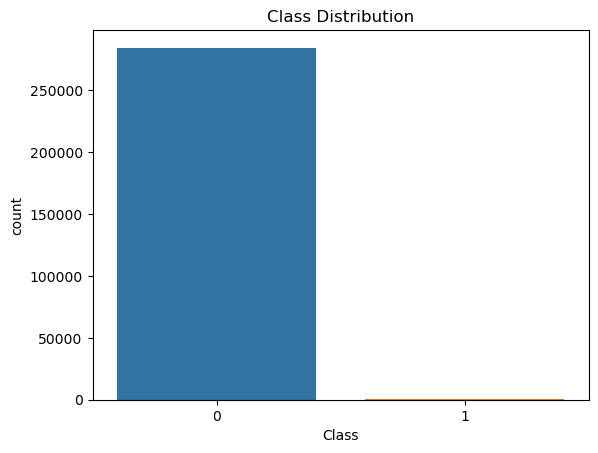

In [12]:
sns.countplot(df, x="Class")
plt.title("Class Distribution");

## Inference
- Plot suggests the data is highly imbalanced i.e using this data in our model will lead to many errors 

## Viz transaction amount and time distribution

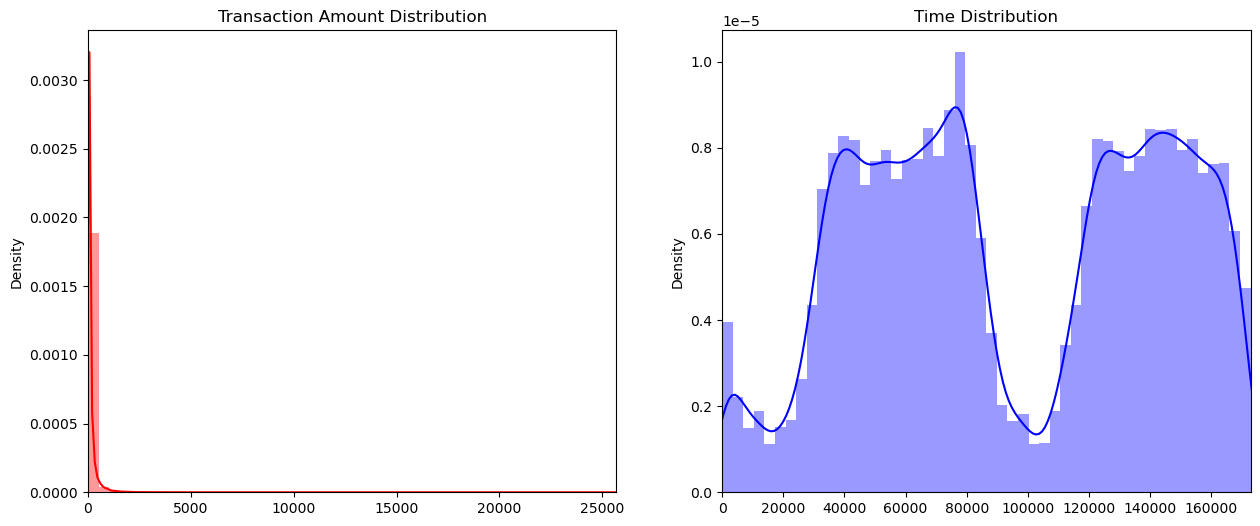

In [22]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
sns.distplot(df["Amount"].values, ax=ax[0], color="r")
ax[0].set_title("Transaction Amount Distribution")
ax[0].set_xlim([min(df["Amount"].values),max(df["Amount"].values)])
sns.distplot(df["Time"].values, ax=ax[1], color="b")
ax[1].set_title("Time Distribution")
ax[1].set_xlim([min(df["Time"].values),max(df["Time"].values)])
plt.show();

# Data Preparation

## Scaling trans amount and time feat

In [3]:
std = StandardScaler()
rts = RobustScaler()

In [4]:
df["scaled_amount"] = rts.fit_transform(df["Amount"].values.reshape(-1,1))
df["scaled_time"] = rts.fit_transform(df["Time"].values.reshape(-1,1))

In [5]:
df[["scaled_amount", "scaled_time"]].head()

,scaled_amount,scaled_time
0,1.783274,-0.994983
1,-0.269825,-0.994983
2,4.983721,-0.994972
3,1.418291,-0.994972
4,0.670579,-0.994960


In [6]:
df.drop(["Amount", "Time"], axis=1, inplace=True)

In [7]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [8]:
scaled_amount = df["scaled_amount"]
scaled_time = df["scaled_time"]

In [9]:
df.drop(["scaled_amount", "scaled_time"], axis=1, inplace=True)

In [10]:
df.insert(0, "scaled_amount", scaled_amount)
df.insert(1, "scaled_time", scaled_time)

In [11]:
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


## Splitting data(train & test)

In [12]:
print("Non-fraudulent trans: ", round(df["Class"].value_counts(normalize=True)[0]*100,2),"% of the data")
print("Fraudulent trans: ", round(df["Class"].value_counts(normalize=True)[1]*100,2),"% of the data")

Non-fraudulent trans:  99.83 % of the data
Fraudulent trans:  0.17 % of the data


In [127]:
y = df["Class"]
X = df.drop(["Class"], axis=1)

In [128]:
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [129]:
for train_index, test_index in sss.split(X, y):
    print(f"train index: {train_index}")
    print(f"test index: {test_index}")
    orig_X_train, orig_X_test, orig_y_train, orig_y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

train index: [ 30473  30496  31002 ... 284804 284805 284806]
test index: [    0     1     2 ... 57017 57018 57019]
train index: [     0      1      2 ... 284804 284805 284806]
test index: [ 30473  30496  31002 ... 113964 113965 113966]
train index: [     0      1      2 ... 284804 284805 284806]
test index: [ 81609  82400  83053 ... 170946 170947 170948]
train index: [     0      1      2 ... 284804 284805 284806]
test index: [150654 150660 150661 ... 227866 227867 227868]
train index: [     0      1      2 ... 227866 227867 227868]
test index: [212516 212644 213092 ... 284804 284805 284806]


In [16]:
print(f"Xtrain: {X_train.shape}")
print(f"Xtest: {X_test.shape}")
print(f"ytrain: {y_train.shape}")
print(f"ytest: {y_test.shape}")

Xtrain: (227846, 30)
Xtest: (56961, 30)
ytrain: (227846,)
ytest: (56961,)


In [17]:
train_uniq_label, train_count_label = np.unique(y_train.values, return_counts=True)
test_uniq_label, test_count_label = np.unique(y_test.values, return_counts=True)

In [18]:
train_count_label

array([227452,    394], dtype=int64)

In [19]:
train_uniq_label

array([0, 1], dtype=int64)

In [20]:
print("Checking if train, test distribution are similarly distributed", end="\n")
print(train_count_label/len(y_train))
print(test_count_label/len(y_test))

Checking if train, test distribution are similarly distributed
[0.99827076 0.00172924]
[0.99827952 0.00172048]


## Random Under-sampling

In [180]:
len(df[df["Class"] == 1])

492

In [181]:
len(df.loc[df["Class"] == 1])

492

In [87]:
df.loc[df["Class"] == 0][:492]

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,-0.296933,-0.990789,-0.711928,1.547423,1.799759,2.489060,0.450497,1.073762,0.309374,0.450854,...,0.356887,-0.115133,-0.136653,0.052595,-0.327937,-0.531480,0.005533,0.515896,0.250372,0
488,-0.063858,-0.990778,1.106251,0.398625,0.860421,2.388862,-0.365843,-0.192568,-0.121769,0.150876,...,-0.200064,-0.253189,-0.952836,0.181643,0.222462,0.083552,-0.342278,-0.017021,0.020976,0
489,0.274436,-0.990778,-0.424666,0.554293,1.374234,-0.447451,0.288248,-1.082536,0.969035,-0.347446,...,0.240344,-0.023296,0.103502,0.024513,0.425008,-0.227746,0.182264,0.076720,-0.098667,0
490,-0.289387,-0.990766,1.261597,0.256346,0.513254,0.619054,-0.472482,-0.989342,0.065431,-0.208781,...,-0.090150,-0.257305,-0.739810,0.135646,0.376418,0.220320,0.094706,-0.028559,0.019023,0


In [21]:
# Random shuffling 100% sample of the original data
df1 = df.sample(frac=1)

In [22]:
len(df1)

284807

In [23]:
fraud_df = df1.loc[df1["Class"] == 1]
non_fraud_df = df1.loc[df1["Class"] != 1][:492]

In [24]:
len(non_fraud_df)+len(fraud_df)

984

In [25]:
# Normal distributed data
norm_df = pd.concat([fraud_df, non_fraud_df])
norm_df

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
152223,-0.186683,0.146019,-17.976266,12.864989,-19.575066,11.345120,-13.998646,-0.354900,-23.783470,-4.872353,...,2.419921,-4.300432,2.865772,1.489302,0.386039,-0.232392,0.413827,-3.255981,-0.538963,1
41943,-0.296793,-0.514574,-2.140511,4.104871,-8.996859,4.028391,-5.131359,-4.153568,-9.360095,1.922075,...,1.725578,1.854267,-0.165534,-0.339939,0.296314,1.364225,-0.518996,2.352333,1.130625,1
281674,0.286872,1.006309,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,...,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,1
201098,-0.307413,0.576123,1.176633,3.141918,-6.140445,5.521821,1.768515,-1.727186,-0.932429,0.292797,...,0.329568,0.129372,-0.803021,-0.074098,-0.031084,0.375366,0.065897,0.488258,0.325872,1
151008,-0.293440,0.113606,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,-11.438920,...,2.812241,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172658,1.812199,0.428788,0.456154,0.201105,-1.337071,-0.129955,0.790431,-0.626131,0.994262,-1.179340,...,-0.039667,1.073134,0.472243,-0.439237,-0.406990,0.594285,-0.055921,0.209065,0.313245,0
135331,-0.243695,-0.040978,-0.397014,1.077047,1.395135,-0.004786,-0.036050,-0.773801,0.611228,0.068818,...,0.109653,-0.200149,-0.551930,0.001871,0.479864,-0.222916,0.042284,0.240793,0.089829,0
145379,-0.294977,0.025823,-0.228884,1.069879,-0.786502,-0.645824,0.622536,-0.375152,0.469521,0.452215,...,-0.157367,0.418017,1.224540,-0.093849,0.357881,-0.766530,-0.244067,0.369146,0.250676,0
273860,-0.211137,0.952091,1.880641,-0.724614,-0.741296,-0.038709,0.293563,1.955834,-1.124792,0.697799,...,-0.283814,0.231192,0.889920,0.199616,-0.911216,-0.443197,0.653137,0.015924,-0.069854,0


In [26]:
# Suffling the normal dist data
new_df = norm_df.sample(frac=1, random_state=42)

In [27]:
new_df

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
214911,-0.252079,0.648234,2.062301,-0.074592,-1.097400,0.405897,-0.135693,-1.183212,0.171375,-0.319170,...,-0.232073,-0.294526,-0.729547,0.333335,-0.030155,-0.298394,0.200257,-0.072658,-0.060656,0
152295,-0.170195,0.147358,-17.537592,12.352519,-20.134613,11.122771,-14.571080,-0.381622,-23.928661,-4.724921,...,1.925103,-4.352213,2.389041,2.019128,0.627192,-1.085997,-0.071803,-3.838198,-0.802564,1
113171,-0.297911,-0.137795,-3.192849,2.796937,-0.330872,-1.847086,-1.170169,-0.849876,-0.402689,1.110856,...,0.977295,-0.321851,-0.438302,0.128870,-0.019903,0.221207,0.719045,0.403862,-0.035278,0
189701,0.996996,0.514891,-4.599447,2.762540,-4.656530,5.201403,-2.470388,-0.357618,-3.767189,0.061466,...,-1.000658,1.581480,0.261333,0.621415,0.994110,-0.687853,-0.337531,-1.612791,1.231425,1
116404,4.042199,-0.122534,-2.250535,2.365755,-2.955491,0.089791,-2.830745,-0.844462,-0.174062,-0.407138,...,-0.486537,0.256560,-0.466245,0.291105,0.242567,-1.279094,-1.123534,-0.630977,0.326839,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42696,0.925452,-0.510920,-8.426814,6.241659,-9.946470,8.199614,-8.213093,-2.522046,-11.643028,5.339500,...,0.563869,2.427460,0.692667,0.020305,0.499809,0.467594,0.483162,1.195671,0.198294,1
15566,1.089779,-0.678239,-23.237920,13.487386,-25.188773,6.261733,-17.345188,-4.534989,-17.100492,15.374630,...,1.630787,1.769708,-1.691973,-1.045673,0.143386,1.611577,-0.221576,1.481233,0.438125,1
13117,-0.108014,-0.724456,-1.073887,-0.670623,3.189816,-3.183185,-0.629365,0.134746,-0.495154,0.225286,...,-0.131162,0.000093,0.813526,-0.570077,0.001648,0.867292,-0.801812,-0.062810,-0.169431,0
151007,-0.293440,0.113606,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,-11.438920,...,2.812241,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1


## Data Prep Continued....

## Distribution of class in new sub-sample data

In [28]:
new_df["Class"].value_counts(normalize=True)*100

Class
0    50.0
1    50.0
Name: proportion, dtype: float64

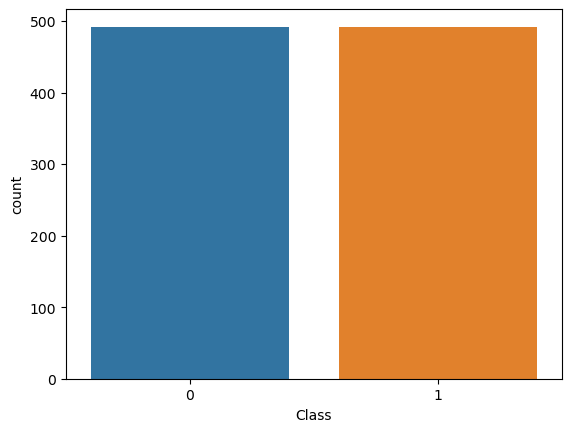

In [124]:
sns.countplot(new_df, x="Class");##

## Correlation Analysis

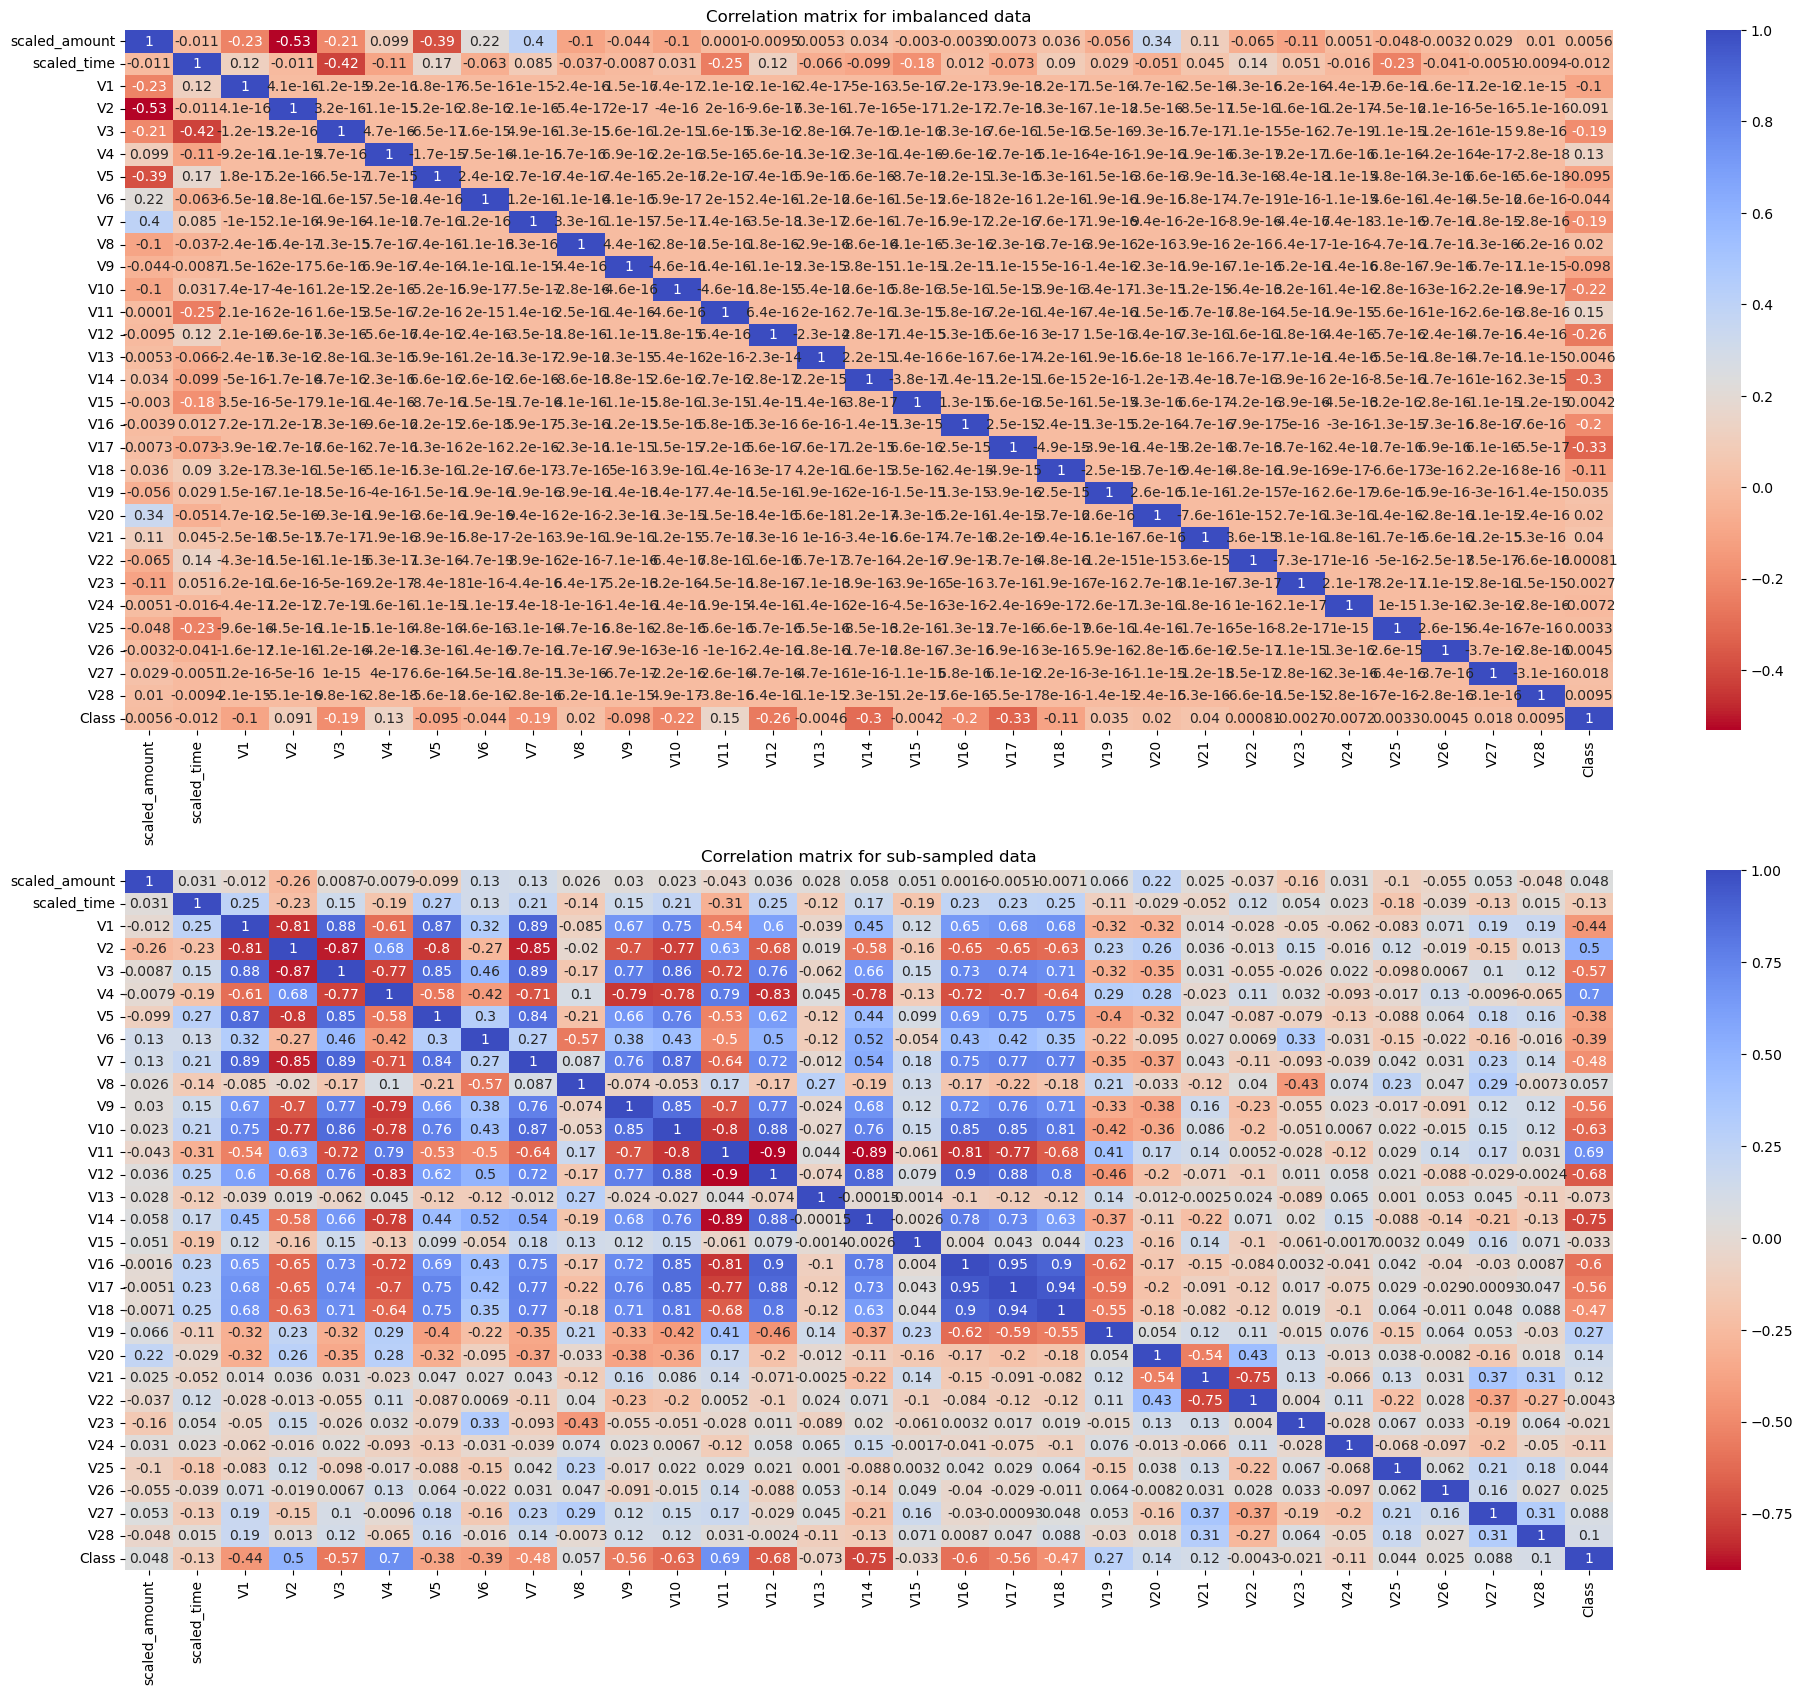

In [132]:
fig, ax = plt.subplots(2,1,figsize=(24,20))

sns.heatmap(df.corr(), annot=True, cmap="coolwarm_r", ax=ax[0])
ax[0].set_title("Correlation matrix for imbalanced data")
sns.heatmap(new_df.corr(), annot=True, cmap="coolwarm_r", ax=ax[1])
ax[1].set_title("Correlation matrix for sub-sampled data")
plt.show();

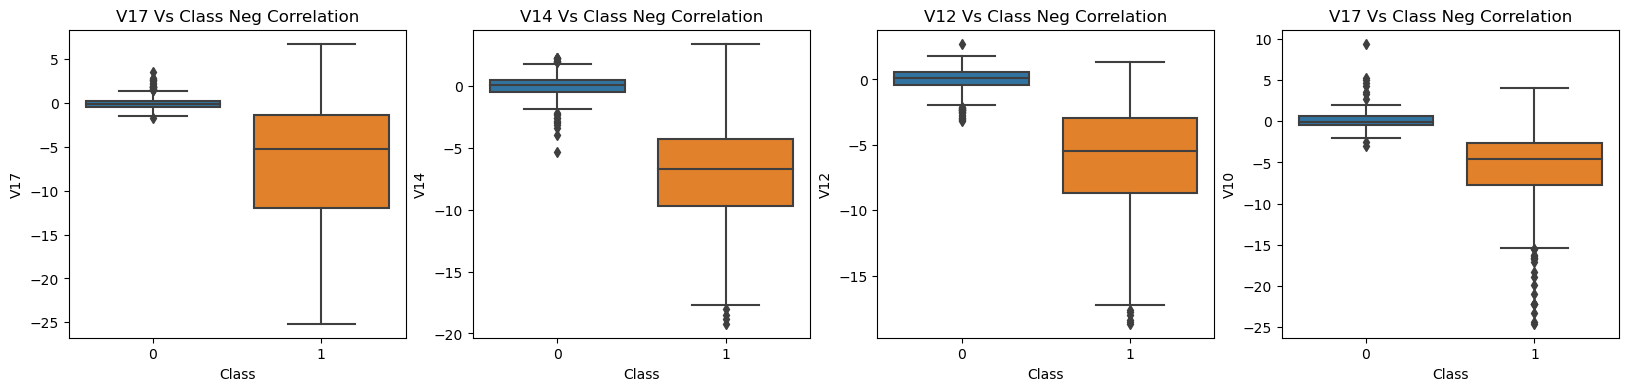

In [137]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 4))
sns.boxplot(new_df, x="Class", y="V17", ax=ax[0])
ax[0].set_title("V17 Vs Class Neg Correlation")

sns.boxplot(new_df, x="Class", y="V14", ax=ax[1])
ax[1].set_title("V14 Vs Class Neg Correlation")

sns.boxplot(new_df, x="Class", y="V12", ax=ax[2])
ax[2].set_title("V12 Vs Class Neg Correlation")

sns.boxplot(new_df, x="Class", y="V10", ax=ax[3])
ax[3].set_title("V17 Vs Class Neg Correlation")

plt.show();

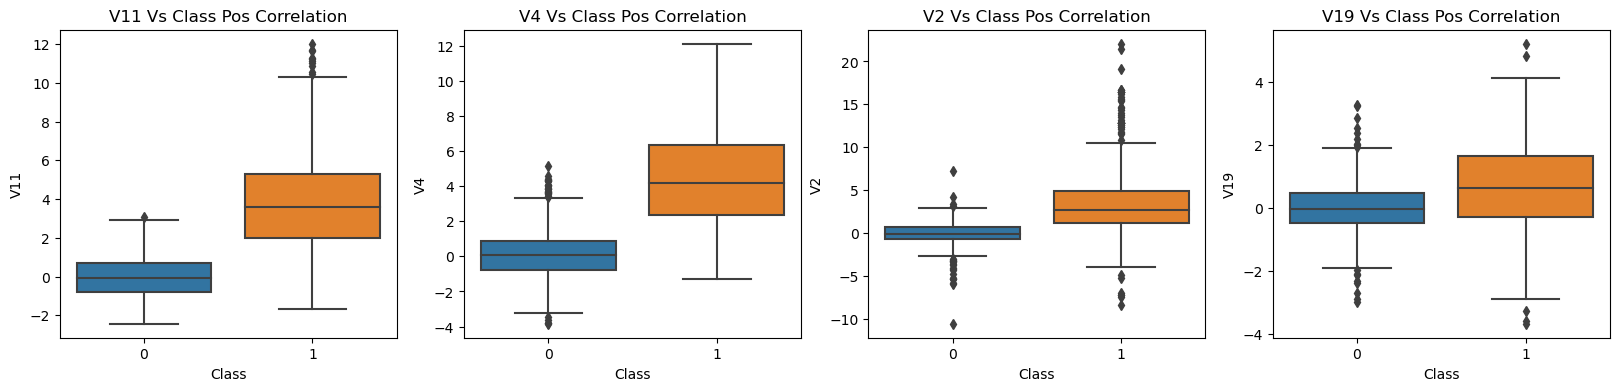

In [138]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 4))
sns.boxplot(new_df, x="Class", y="V11", ax=ax[0])
ax[0].set_title("V11 Vs Class Pos Correlation")

sns.boxplot(new_df, x="Class", y="V4", ax=ax[1])
ax[1].set_title("V4 Vs Class Pos Correlation")

sns.boxplot(new_df, x="Class", y="V2", ax=ax[2])
ax[2].set_title("V2 Vs Class Pos Correlation")

sns.boxplot(new_df, x="Class", y="V19", ax=ax[3])
ax[3].set_title("V19 Vs Class Pos Correlation")

plt.show();

## Anomaly Detection

### Objective
- Our main aim in this section is to remove "extreme outliers" from features that have a high correlation with our classes. This will have a positive impact on the accuracy of our models.

#### Viz Distribution of Neg Correlated Features

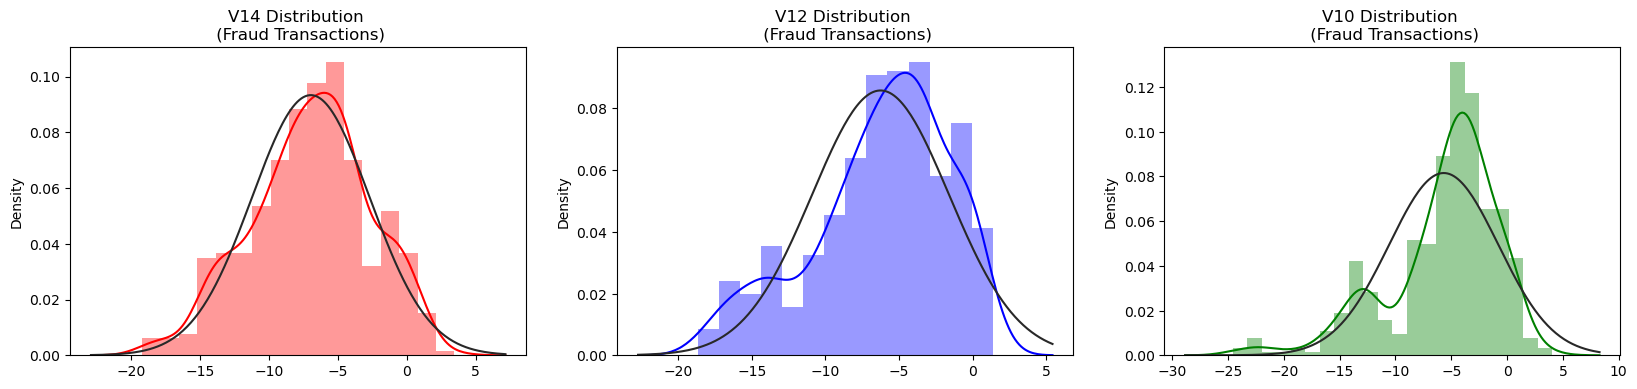

In [143]:
fig, ax = plt.subplots(1,3, figsize=(20,4))

v14_fraud_dist = new_df["V14"].loc[new_df["Class"] == 1].values
sns.distplot(v14_fraud_dist, fit=norm, ax=ax[0], color="red")
ax[0].set_title("V14 Distribution \n (Fraud Transactions)")

v14_fraud_dist = new_df["V12"].loc[new_df["Class"] == 1].values
sns.distplot(v14_fraud_dist, fit=norm, ax=ax[1], color="blue")
ax[1].set_title("V12 Distribution \n (Fraud Transactions)")

v14_fraud_dist = new_df["V10"].loc[new_df["Class"] == 1].values
sns.distplot(v14_fraud_dist, fit=norm, ax=ax[2], color="green")
ax[2].set_title("V10 Distribution \n (Fraud Transactions)")

plt.show();

#### Outlier removal

In [29]:
v14_fraud = new_df["V14"].loc[new_df["Class"] == 1]

In [30]:
v14_fraud

152295    -3.547230
189701    -6.177365
116404    -4.629481
77348     -6.174288
44556     -7.245550
            ...    
137705    -5.429362
42696    -14.107464
15566     -7.327222
151007    -3.926207
226814    -7.462961
Name: V14, Length: 492, dtype: float64

In [31]:
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)

In [32]:
print(f"Quartile 25: {q25}, Quartile 75: {q75}")

Quartile 25: -9.692722964972386, Quartile 75: -4.282820849486865


In [33]:
v14_iqr = q75 - q25

In [34]:
print(f"iqr: {v14_iqr}")

iqr: 5.409902115485521


In [35]:
v14_cut_off = 1.5*v14_iqr

In [36]:
v14_lower, v14_higher = q25 - v14_cut_off, q75 + v14_cut_off

In [37]:
print(f"Cutoff: {v14_cut_off}")
print(f"lower cutoff: {v14_lower}")
print(f"higher cutoff: {v14_higher}")

Cutoff: 8.114853173228282
lower cutoff: -17.807576138200666
higher cutoff: 3.8320323237414167


In [38]:
outliers = [x for x in v14_fraud if x < v14_lower or x > v14_higher]

In [39]:
outliers

[-18.8220867423816, -18.4937733551053, -18.0499976898594, -19.2143254902614]

In [40]:
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-18.8220867423816, -18.4937733551053, -18.0499976898594, -19.2143254902614]


In [41]:
new_df[(new_df["V14"] > v14_higher) | (new_df["V14"] < v14_lower)].index

Index([8615, 9035, 11300, 9252, 8296], dtype='int64')

In [42]:
new_df = new_df.drop(new_df[(new_df["V14"] > v14_higher) | (new_df["V14"] < v14_lower)].index)

In [43]:
# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.0475965708216, -18.6837146333443, -18.5536970096458, -18.4311310279993]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 975
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-15.2318333653018, -14.9246547735487, -23.2282548357516, -18.2711681738888, -22.1870885620007, -15.5637913387301, -16.2556117491401, -15.3460988468775, -16.6011969664137, -24.5882624372475, -15.5637913387301, -24.4031849699728, -16.3035376590131, -15.2399619587112, -15.1237521803455, -18.9132433348732, -22.1870885620007, -16.7460441053944, -22.1870885620007, -20.9491915543611, -15.2399619587112, -15.1241628144947, -19.836148851696, -17.1415136412892, -16.6496281595399, -14.9246547735487, -22.1870885620007]
F

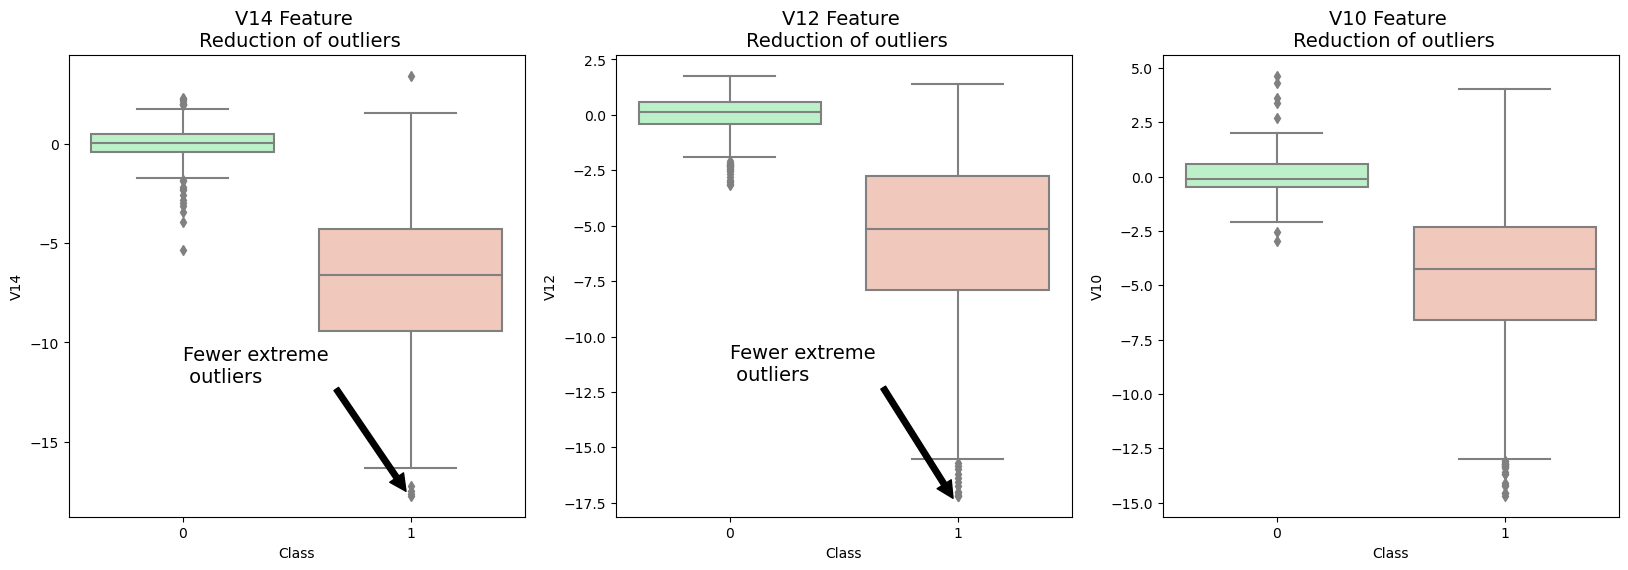

In [165]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

## Dimensionality Reduction & Clustering

In [44]:
X = new_df.drop("Class", axis=1)
y = new_df["Class"]

### T-SNE Implementation

In [56]:
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()

print(f"T-SNE took about: {t1-t0} seconds")

T-SNE took about: 3.3339433670043945 seconds


### PCA 

In [57]:
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()

print(f"PCA took about: {t1-t0} seconds")

PCA took about: 0.008160114288330078 seconds


### TruncatedSVD

In [58]:
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm="randomized", random_state=42).fit_transform(X.values)
t1 = time.time()

print(f"SVD took about: {t1-t0} seconds")

SVD took about: 0.013030767440795898 seconds


In [51]:
X_reduced_tsne

array([[-0.29798283, -0.33078685],
       [ 0.94087955,  3.40431565],
       [16.7335946 , -2.88051159],
       ...,
       [46.39509758, 22.40752031],
       [-0.78091301, -0.06296956],
       [16.88186701, -2.05309291]])

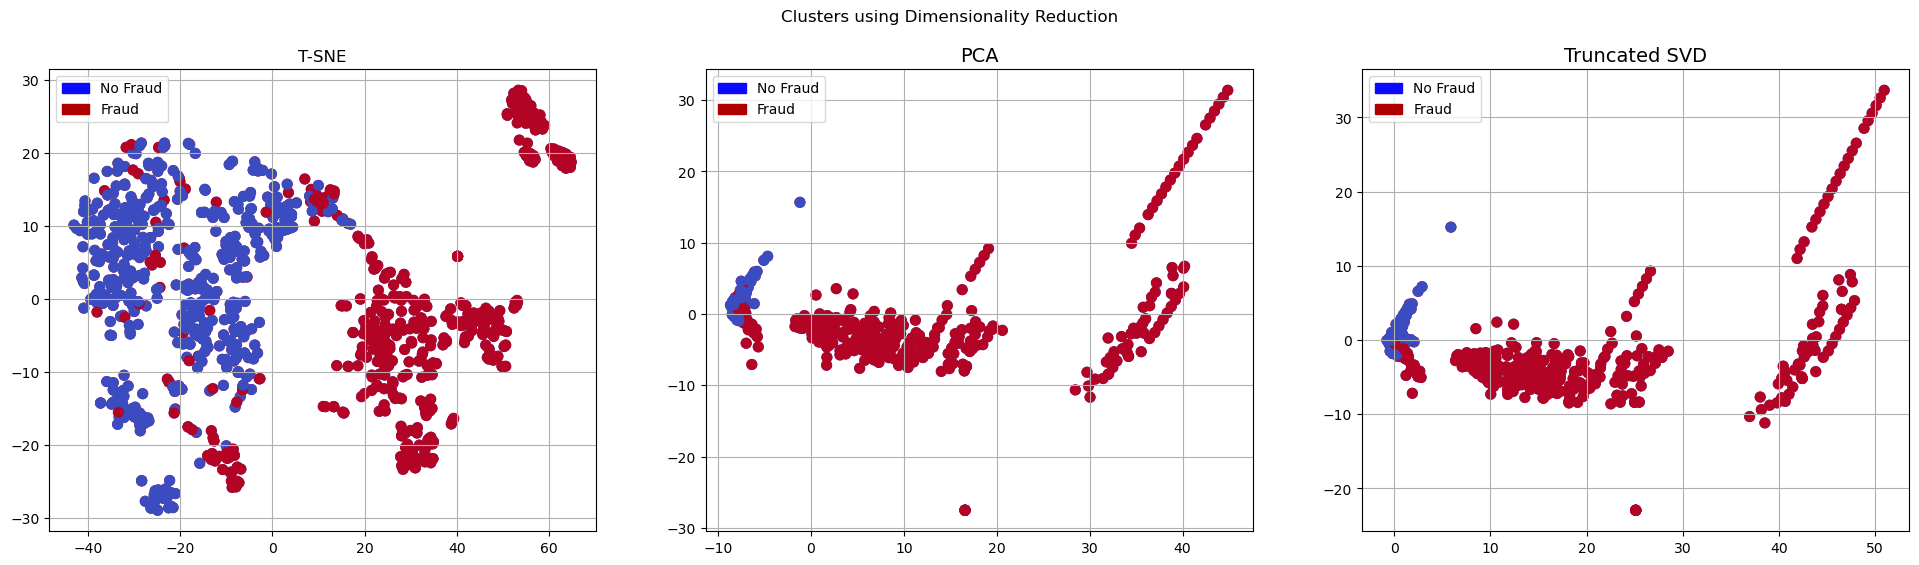

In [60]:
fig, ax = plt.subplots(1,3, figsize=(24,6))

fig.suptitle("Clusters using Dimensionality Reduction")

blue_patch = mpatches.Patch(color="#0A0AFF" , label="No Fraud")
red_patch = mpatches.Patch(color="#AF0000" , label="Fraud")

# T-SNE scatterplot
ax[0].scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap="coolwarm", label="No Fraud", linewidths=2)
ax[0].scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap="coolwarm", label="Fraud", linewidths=2)

ax[0].set_title("T-SNE")
ax[0].grid(True)

ax[0].legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax[1].scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax[1].scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax[1].set_title('PCA', fontsize=14)

ax[1].grid(True)

ax[1].legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax[2].scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax[2].scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax[2].set_title('Truncated SVD', fontsize=14)

ax[2].grid(True)

ax[2].legend(handles=[blue_patch, red_patch])


plt.show();

# Model Training

In [61]:
X = new_df.drop("Class", axis=1)
y = new_df["Class"]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [65]:
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [75]:
for k, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(f"Classifiers:, {classifier.__class__.__name__} has a training score of {round(training_score.mean(), 2)*100}, % accuracy score")

Classifiers:, LogisticRegression has a training score of 94.0, % accuracy score
Classifiers:, KNeighborsClassifier has a training score of 94.0, % accuracy score
Classifiers:, SVC has a training score of 94.0, % accuracy score
Classifiers:, DecisionTreeClassifier has a training score of 90.0, % accuracy score


### Hyperparameter Tuning

In [77]:
# Logistic Reg
log_reg_params = {"penalty": ["l1", "l2"], "C": [0.001,0.01,0.1,1,10,100,1000]}

In [78]:
log_reg_params

{'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [79]:
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [80]:
log_reg = grid_log_reg.best_estimator_
log_reg

LogisticRegression(C=1000)

In [84]:
list(range(2,5))

[2, 3, 4]

In [85]:
# KNN
knears_params = {"n_neighbors": list(range(2,5)), "algorithm": ["auto", "ball_tree", "kd_tree","brute"]}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)

knn = grid_knears.best_estimator_

In [87]:
# SVC
svc_params = {"C": [0.5,0.7,0.9,1], "kernel": ["rbf", "poly", "sigmoid", "linear"]}

grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

svc = grid_svc.best_estimator_

In [89]:
# Decision Tree
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4)), "min_samples_leaf": list(range(5,7))}

grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

tree_clf = grid_tree.best_estimator_

In [97]:
# Overfitting case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print("Logistic Reg cross val score: ", round(log_reg_score.mean(),2)*100,"%")

knears_score = cross_val_score(knn, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Reg cross val score:  94.0 %
Knears Neighbors Cross Validation Score 94.02%
Support Vector Classifier Cross Validation Score 94.29%
DecisionTree Classifier Cross Validation Score 91.5%


In [101]:
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5, method="decision_function")

knears_pred = cross_val_predict(knn, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5, method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [103]:
print(f"Log Reg: {roc_auc_score(y_train, log_reg_pred)}")
print(f"KNN: {roc_auc_score(y_train, knears_pred)}")
print(f"SVC: {roc_auc_score(y_train, svc_pred)}")
print(f"Decsion Tree: {roc_auc_score(y_train, tree_pred)}")

Log Reg: 0.9706527119722792
KNN: 0.9381974400678877
SVC: 0.9837210946892017
Decsion Tree: 0.9141468071564953


## Deep-dive into logistic reg classification

In [106]:
log_fpr, log_tpr, log_threshold = roc_curve(y_train, log_reg_pred)

In [114]:
def log_reg_curve(log_fpr, log_tpr):
    plt.figure(figsize=(15,8))
    plt.title("Log Reg Curve", fontsize=16)
    plt.plot(log_fpr, log_tpr, "b-", linewidth=2)
    plt.plot([0,1],[0,1], "r--")
    plt.xlabel("False Positive Rate", fontsize=16)
    plt.ylabel("True Positive Rate", fontsize=16)
    plt.axis([-0.01,1,0,1])

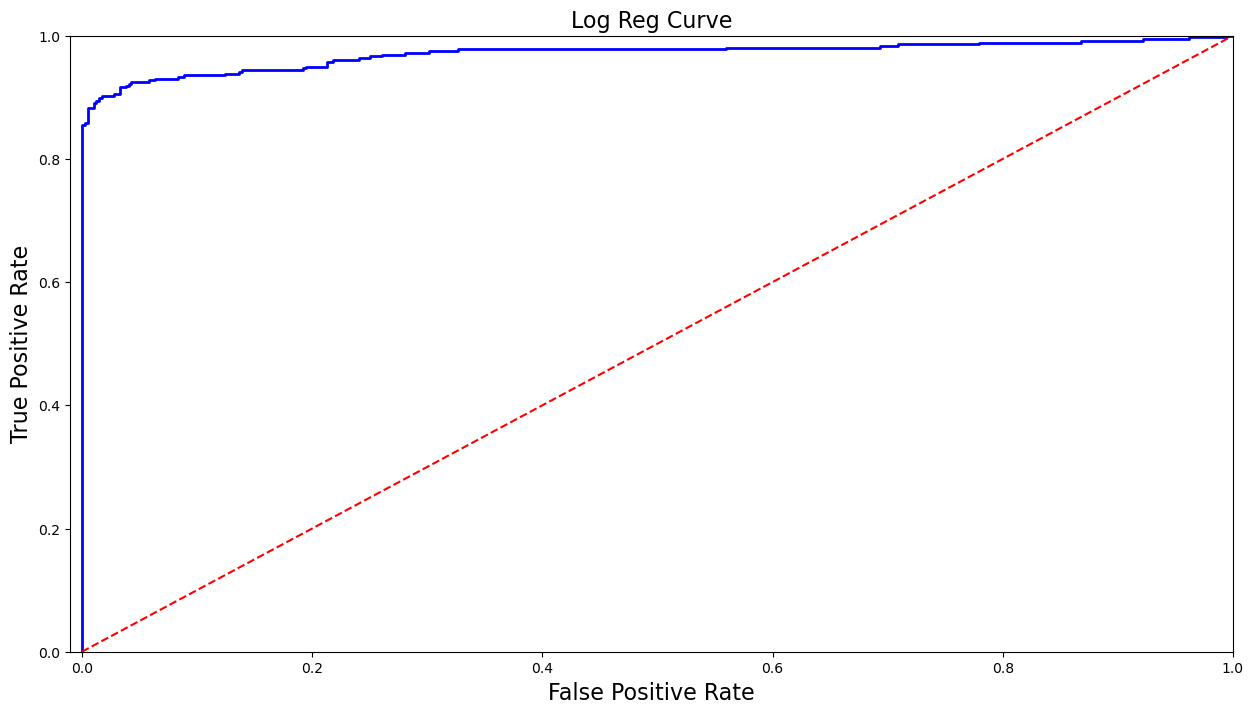

In [115]:
log_reg_curve(log_fpr, log_tpr)

In [117]:
precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [118]:
y_pred = log_reg.predict(X_train)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,

In [124]:
# Overfitting case
print("---"*100)
print("Overfitting: \n")
print(f"Recall score: {recall_score(y_train, y_pred)}")
print(f"Precision score: {precision_score(y_train, y_pred)}")
print(f"F1 score: {f1_score(y_train, y_pred)}")
print(f"Accuracy score: {accuracy_score(y_train, y_pred)}")
print("---"*100)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall score: 0.9497206703910615
Precision score: 0.9826589595375722
F1 score: 0.9659090909090908
Accuracy score: 0.9681274900398407
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


### SMOTE(Synthetic Minority Over Sampling)

In [130]:
print(f"Length of X {len(orig_X_train)} | length of y {len(orig_y_train)} train")
print(f"Length of X {len(orig_X_test)} | length of y {len(orig_y_test)} test")

Length of X 227846 | length of y 227846 train
Length of X 56961 | length of y 56961 test


In [133]:
# List to append the score and find the average
recall_lst, precision_lst, accuracy_lst, auc_lst, f1_lst = [], [], [], [], []

In [134]:
log_reg_params

{'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [135]:
log_reg_sm = LogisticRegression()
rand_log_reg = RandomizedSearchCV(log_reg_sm, log_reg_params, n_iter=4)

In [136]:
rand_log_reg

RandomizedSearchCV(estimator=LogisticRegression(), n_iter=4,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2']})

In [141]:
for train, test in sss.split(orig_X_train, orig_y_train):
    print(test)

[    0     1     2 ... 45630 45631 45632]
[17453 17480 18466 ... 91190 91191 91192]
[ 57248  57470  57615 ... 136732 136733 136734]
[107637 108258 108708 ... 182324 182325 182326]
[150925 151006 151007 ... 227843 227844 227845]


In [143]:
orig_X_train.iloc[train]

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182322,-0.132746,0.477672,2.268986,-1.306433,-0.543769,-1.482839,-1.421054,-0.683172,-1.215676,-0.213854,...,-0.352503,-0.352564,-0.114332,0.228270,0.329891,1.156590,-0.273421,-0.238487,0.030304,-0.031709
182323,-0.228324,0.477684,-0.185257,1.102215,-0.206768,-0.188477,0.970139,-1.406100,1.087611,-0.423316,...,-0.085849,-0.065065,0.356998,1.186356,-0.288998,0.022227,-0.466527,-0.178980,0.123196,0.240804
182324,2.723119,0.477684,1.692781,-0.201306,-2.519907,1.461904,0.701510,-1.542165,1.432738,-0.730228,...,-0.337658,0.156847,0.433586,0.993490,-0.425314,0.049406,0.824836,-0.217694,-0.091423,-0.041195
182325,-0.307133,0.477684,-0.507947,-0.546918,2.291673,-2.112876,-0.845382,-0.425270,-0.858402,0.256730,...,-0.521137,0.000719,0.512459,1.377962,-0.181414,-0.003468,-0.405188,-0.195736,0.166438,0.161655


In [146]:
# Implementing SMOTE
for train, test in sss.split(orig_X_train, orig_y_train):
    pipeline = imb_pipeline(SMOTE(sampling_strategy="minority"), rand_log_reg)
    model = pipeline.fit(orig_X_train.iloc[train], orig_y_train.iloc[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(orig_X_train.iloc[test])
    
    accuracy_lst.append(pipeline.score(orig_X_train.iloc[test], orig_y_train.iloc[test]))
    precision_lst.append(precision_score( orig_y_train.iloc[test], prediction))
    recall_lst.append(recall_score( orig_y_train.iloc[test], prediction))
    f1_lst.append(f1_score( orig_y_train.iloc[test], prediction))
    auc_lst.append(roc_auc_score( orig_y_train.iloc[test], prediction))
    
print("---"*100)
print(f"accuracy: {np.mean(accuracy_lst)}")
print(f"precision: {np.mean(precision_lst)}")
print(f"recall: {np.mean(recall_lst)}")
print(f"f1: {np.mean(f1_lst)}")
print("---"*100)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
accuracy: 0.9426724659731637
precision: 0.06241803552694604
recall: 0.9137293086660175
f1: 0.11495153880596347
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [149]:
labels = ["No Fraud", "Fraud"]
smote_pred = best_est.predict(orig_X_test)
print(classification_report(orig_y_test, smote_pred, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.11      0.85      0.20        98

    accuracy                           0.99     56961
   macro avg       0.56      0.92      0.60     56961
weighted avg       1.00      0.99      0.99     56961



## Interpretation
Precision: Precision for "No Fraud" is very high (1.00), indicating that almost all transactions predicted as "No Fraud" were indeed "No Fraud". However, precision for "Fraud" is low (0.10), suggesting that a significant portion of transactions predicted as "Fraud" were actually not fraudulent.

Recall: Recall for "No Fraud" is also very high (0.99), meaning that the model correctly identified the majority of actual "No Fraud" cases. For "Fraud", the recall is also high (0.86), indicating that the model was able to capture a significant portion of the actual fraudulent cases.

F1-score: The F1-score for "No Fraud" is very high (0.99), which indicates a good balance between precision and recall. However, the F1-score for "Fraud" is relatively low (0.19), reflecting the imbalance between precision and recall in the "Fraud" class.

Support: The number of instances of each class in the dataset.

Overall Interpretation:
The model performs exceptionally well in identifying non-fraudulent transactions, as indicated by the high precision, recall, and F1-score for the "No Fraud" class. However, it performs poorly in detecting fraudulent transactions, as evidenced by the low precision and F1-score despite a relatively high recall for the "Fraud" class. This suggests that while the model is good at identifying non-fraudulent transactions, it has significant room for improvement in correctly identifying fraudulent ones, possibly due to class imbalance or other issues in the dataset. Further optimization or rebalancing techniques may be necessary to improve the model's performance in detecting fraudulent transactions.

In [151]:
# SMOTE after splitting and cross validating
sm = SMOTE(sampling_strategy="minority", random_state=42)

In [152]:
sm

SMOTE(random_state=42, sampling_strategy='minority')

In [155]:
grid_log_reg

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [154]:
Xsm_train, y_smtrain = sm.fit_resample(orig_X_train, orig_y_train)

In [157]:
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, y_smtrain)
t1 = time.time()
print(f"Fitting oversample data took {t1-t0} seconds")

Fitting oversample data took 5.18154764175415 seconds


# Evaluating model on test

In [159]:
# Log Reg fitted using SMOTE
y_pred_log_reg_sm = log_reg_sm.predict(X_test)

# other models fitted using Undersampling
y_pred_knn = knn.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)

In [161]:
len(y_pred_log_reg_sm)

189

In [163]:
len(y_test)

189

In [164]:
log_reg_cf = confusion_matrix(y_test, y_pred_log_reg_sm)
knn_cf = confusion_matrix(y_test, y_pred_knn)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

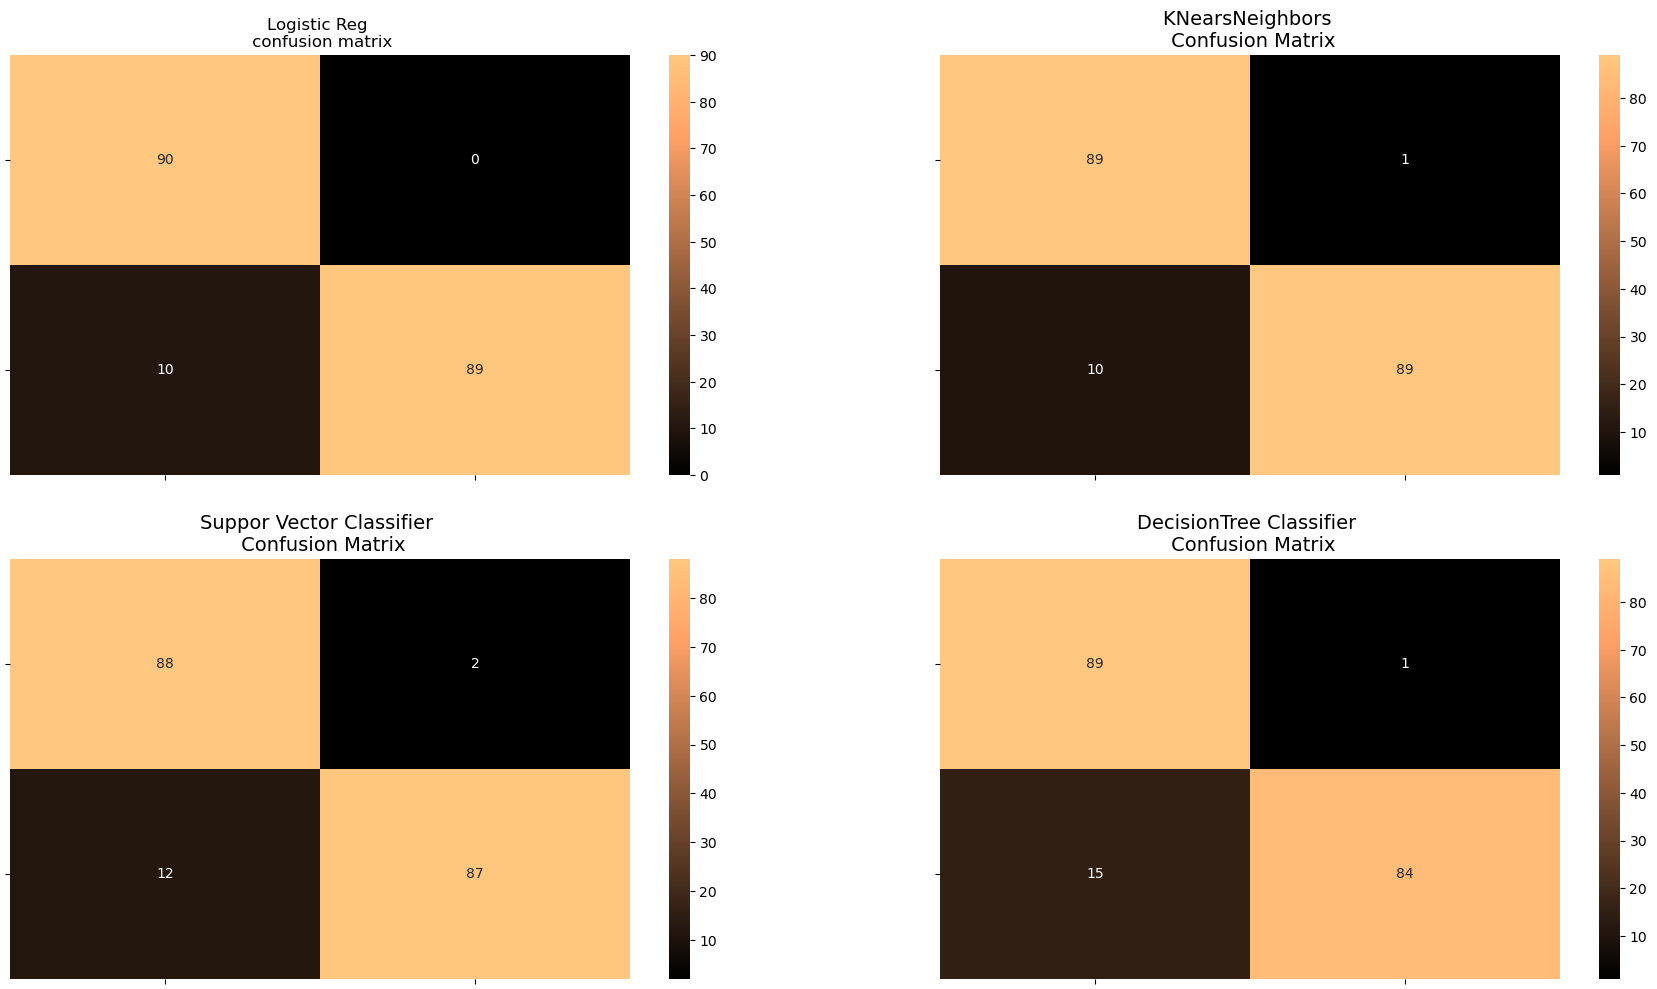

In [169]:
fig, ax = plt.subplots(2,2,figsize=(22,12))

sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0][0].set_title("Logistic Reg \n confusion matrix")
ax[0][0].set_xticklabels(["",""], fontsize=14, rotation=90)
ax[0][0].set_yticklabels(["",""], fontsize=14, rotation=360)

sns.heatmap(knn_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [174]:
print("Log Reg")
print(classification_report(y_test, y_pred_log_reg_sm))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knn))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Tree:')
print(classification_report(y_test, y_pred_tree))

Log Reg
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        90
           1       1.00      0.90      0.95        99

    accuracy                           0.95       189
   macro avg       0.95      0.95      0.95       189
weighted avg       0.95      0.95      0.95       189

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        90
           1       0.99      0.90      0.94        99

    accuracy                           0.94       189
   macro avg       0.94      0.94      0.94       189
weighted avg       0.95      0.94      0.94       189

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93        90
           1       0.98      0.88      0.93        99

    accuracy                           0.93       189
   macro avg       0.93      0.93      0.93       189
weighted avg       0.

### Interpretations
Precision
Precision measures the accuracy of positive predictions, i.e., the ratio of true positive predictions to the total positive predictions (true positives + false positives).
For instance, Logistic Regression has a precision of 1.00 for class 1, meaning it perfectly identifies fraudulent transactions without any false positives. High precision is particularly important in contexts where the cost of false positives is high, such as blocking legitimate transactions thinking they are fraudulent.
Recall
Recall (Sensitivity) measures the ability of the model to find all the positive samples, i.e., the ratio of true positives to the actual positives (true positives + false negatives).
A recall of 0.90 for class 1 in Logistic Regression indicates it captures 90% of fraudulent transactions but misses 10%. High recall is crucial in fraud detection to minimize the number of fraudulent transactions that are not detected.
F1-Score
F1-Score is the harmonic mean of precision and recall, providing a single metric to assess the balance between them. An F1-score reaches its best value at 1 (perfect precision and recall) and worst at 0.
The F1-scores for class 1 across all models are relatively high, suggesting a good balance between precision and recall. This balance is essential in fraud detection to ensure that while most fraudulent transactions are caught, the number of legitimate transactions incorrectly classified as fraudulent remains low.
Accuracy
Accuracy measures the overall correctness of the model, i.e., the ratio of true predictions (both true positives and true negatives) to all predictions.
While all models show high accuracy (92-95%), accuracy alone can be misleading in imbalanced datasets where one class significantly outnumbers the other. Therefore, precision, recall, and F1-score are more critical metrics in such contexts.
Interpretations by Model
Logistic Regression and K-Nearest Neighbors perform comparably well, with Logistic Regression slightly edging out in terms of overall metrics.
Support Vector Classifier shows a slight dip in performance compared to the first two models but still maintains high precision and recall.
Decision Tree has the lowest metrics across the board, indicating it might be more prone to overfitting or not capturing the decision boundary as effectively as the other models in this context.
In conclusion, while Logistic Regression seems to be the most balanced model for detecting fraudulent transactions in this comparison, the choice of model can depend on the specific requirements of the task, such as whether false positives or false negatives are more critical to minimize. Additionally, model performance can often be further improved with hyperparameter tuning, feature engineering, and ensemble methods.

In [179]:
## Log Reg with under-sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)

## Log Reg with SMOTE
y_pred_sm = best_est.predict(orig_X_test)
oversample_score = accuracy_score(orig_y_test, y_pred_sm)

d = {"Technique": ["Random Undersampling", "Oversampling(SMOTE)"], "Score": [undersample_score, oversample_score]}

final_df = pd.DataFrame(data=d)
final_df

,Technique,Score
0,Random Undersampling,0.947090
1,Oversampling(SMOTE),0.988325
